# Multi-Class Classification
Dataset: MNIST
- 10 output classes, one for each digit

## Import modules

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from matplotlib import pyplot as plt

pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

np.set_printoptions(linewidth=200)

## Load the dataset

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


### View the dataset

In [3]:
x_train[2917]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 127, 100, 156, 239, 224, 177, 213, 159,  70,  13,   0,   0

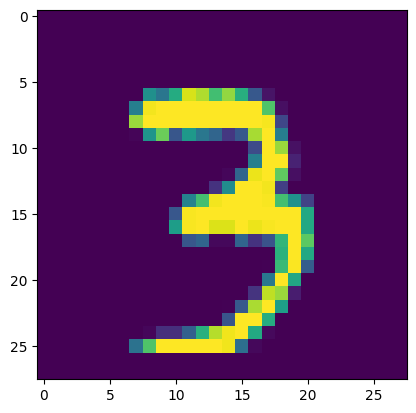

In [4]:
plt.imshow(x_train[2917])

### Normalize feature values
From integer between 0-255 ➡️ to a floating-point value between 0-1.0

In [5]:
x_train_normalized = x_train/255.0
x_test_normalized = x_test/255.0
print(x_train_normalized[2900][10])

[0.         0.         0.         0.         0.         0.         0.         0.55294118 1.         0.66666667 0.11372549 0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]


## Define a plotting function

In [6]:
def plot_curve(epochs, hist, list_of_metrics):
    """Plot a curve of one or more classification metrics vs. epoch."""
    # List of metrics should be one of the names shown in:
    # https://www.tensorflow.org/tutorials/structured_data/imbalanced_data#define_the_model_and_metrics

    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Value")

    for m in list_of_metrics:
        x = hist[m]
        plt.plot(epochs[1:], x[1:], label=m)
    
    plt.legend()

print("Loaded the plot_curve function.")

Loaded the plot_curve function.


## Create a deep neural net model

In [13]:
def create_model(my_learning_rate):
    """Create and compile a deep neural net."""
    model = tf.keras.models.Sequential()

    # The features are stored in a two-dimensional 28X28 array. 
    # Flatten that two-dimensional array into a one-dimensional 
    # 784-element array.
    model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))

    # Define the firs hidden layer.
    model.add(tf.keras.layers.Dense(units=256, activation='relu'))

    # # Define a dropout regularization layer.
    # model.add(tf.keras.layers.Dropout(rate=0.2))

    # Define the second hidden layer.
    model.add(tf.keras.layers.Dense(units=128, activation='relu'))

    # Define a dropout regularization layer.
    model.add(tf.keras.layers.Dropout(rate=0.2))

    # Define the output layer. The units parameter is set to 10 because
    # the model must choose among 10 possible output values (representing
    # the digits from 0 to 9, inclusive).
    model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

    # Construct the layers into a model that TensorFlow can execute.  
    # Notice that the loss function for multi-class classification
    # is different than the loss function for binary classification.
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=my_learning_rate),
                  loss="sparse_categorical_crossentropy",
                  metrics=['accuracy'])
    return model

def train_model(model, train_features, train_label, epochs, batch_size=None, validation_split=0.1):
    """Train the model by feeding it data."""

    history = model.fit(x=train_features, y=train_label, batch_size=batch_size,
                        epochs=epochs, shuffle=True,
                        validation_split=validation_split)
    
    # To track the progression of training, gather a snapshot
    # of the model's metrics at each epoch.
    epochs = history.epoch
    hist = pd.DataFrame(history.history)

    return epochs, hist

### Train the model

Epoch 1/50
12/12 [==============================] - 1s 44ms/step - loss: 1.0375 - accuracy: 0.6983 - val_loss: 0.3365 - val_accuracy: 0.9023
Epoch 2/50
12/12 [==============================] - 0s 21ms/step - loss: 0.3646 - accuracy: 0.8921 - val_loss: 0.2517 - val_accuracy: 0.9287
Epoch 3/50
12/12 [==============================] - 0s 19ms/step - loss: 0.2600 - accuracy: 0.9254 - val_loss: 0.1962 - val_accuracy: 0.9424
Epoch 4/50
12/12 [==============================] - 0s 19ms/step - loss: 0.2054 - accuracy: 0.9405 - val_loss: 0.1617 - val_accuracy: 0.9540
Epoch 5/50
12/12 [==============================] - 0s 18ms/step - loss: 0.1652 - accuracy: 0.9526 - val_loss: 0.1445 - val_accuracy: 0.9587
Epoch 6/50
12/12 [==============================] - 0s 19ms/step - loss: 0.1420 - accuracy: 0.9584 - val_loss: 0.1276 - val_accuracy: 0.9613
Epoch 7/50
12/12 [==============================] - 0s 18ms/step - loss: 0.1197 - accuracy: 0.9652 - val_loss: 0.1171 - val_accuracy: 0.9647
Epoch 8/50
12

[0.08707146346569061, 0.979200005531311]

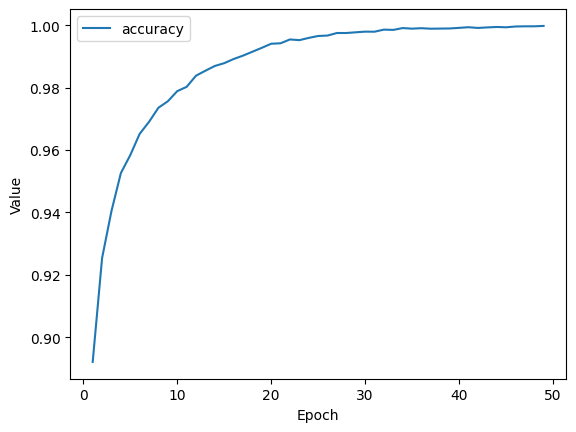

In [14]:
# Hyperparameters variables.
learning_rate = 0.003
epochs = 50
batch_size = 4000
validation_split = 0.2

# Create the model.
my_model = create_model(learning_rate)

# Train the model.
epochs, hist = train_model(my_model, x_train_normalized, y_train, epochs, batch_size, validation_split)

# Plot a graph of metric vs. epochs.
list_of_metrics_to_plot = ['accuracy']
plot_curve(epochs, hist, list_of_metrics_to_plot)

# Evaluate against the test set.
print("\n Evaluate the new model against the test set:")
my_model.evaluate(x=x_test_normalized, y=y_test, batch_size=batch_size)
